In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import random

from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D

from keras.models import Model

np.random.seed(0)

In [2]:
(X_train, y_train), (X_test, y_test)= mnist.load_data()

print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [3]:
# check if format of data is correct
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


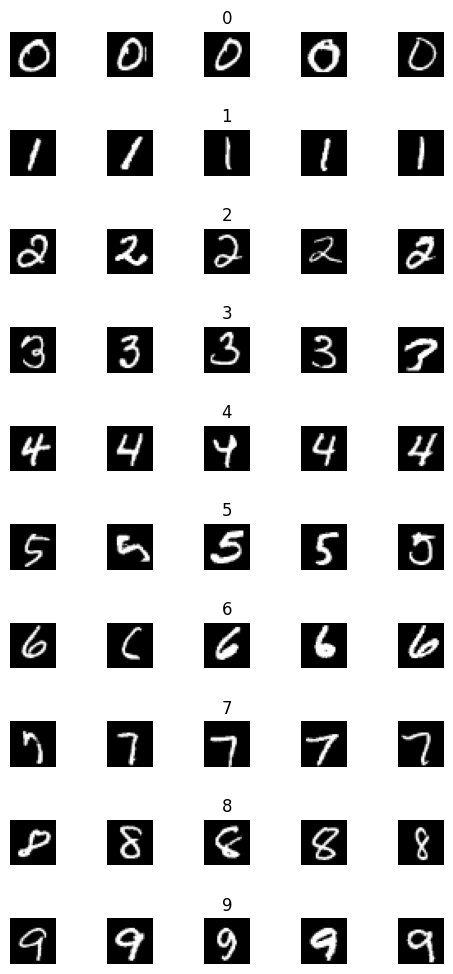

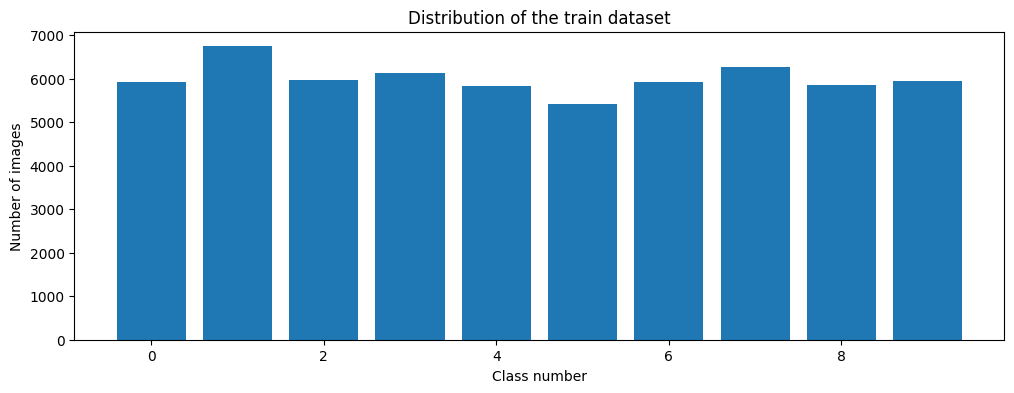

In [4]:
num_of_samples=[]

cols = 5
num_classes = 10

fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))
fig.tight_layout()

for i in range(cols):
    for j in range(num_classes):
      x_selected = X_train[y_train == j]
      axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
      axs[j][i].axis("off")
      if i == 2:
        axs[j][i].set_title(str(j))
        num_of_samples.append(len(x_selected))

print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

# Convolutional network start

In [5]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

X_train = X_train/255
X_test = X_test/255

In [6]:
#define the LeNeT model function
def leNet_model():
  model = Sequential()
  model.add(Conv2D(filters=30, kernel_size=(5,5), input_shape=(28,28,1), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(filters=15, kernel_size=(3,3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Flatten())
  model.add(Dense(500, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))
  model.compile(Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [7]:
model = leNet_model()
print(model.summary())

Metal device set to: Apple M1


2024-10-28 14:42:05.986559: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-10-28 14:42:05.987152: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 30)        780       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 30)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 15)        4065      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 15)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 375)               0         
                                                                 
 dense (Dense)               (None, 500)               1

In [8]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.1, batch_size=400, verbose=1, shuffle=1)

Epoch 1/10


2024-10-28 14:42:09.538017: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-10-28 14:42:09.835287: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


135/135 [==============================] - 6s 28ms/step - loss: 0.2272 - accuracy: 0.9253 - val_loss: 0.0608 - val_accuracy: 0.9820
Epoch 2/10
  1/135 [..............................] - ETA: 4s - loss: 0.0428 - accuracy: 0.9850

2024-10-28 14:42:14.916225: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


135/135 [==============================] - 4s 27ms/step - loss: 0.0714 - accuracy: 0.9782 - val_loss: 0.0384 - val_accuracy: 0.9905
Epoch 3/10
135/135 [==============================] - 4s 26ms/step - loss: 0.0533 - accuracy: 0.9838 - val_loss: 0.0488 - val_accuracy: 0.9848
Epoch 4/10
135/135 [==============================] - 4s 27ms/step - loss: 0.0510 - accuracy: 0.9843 - val_loss: 0.0351 - val_accuracy: 0.9912
Epoch 5/10
135/135 [==============================] - 4s 26ms/step - loss: 0.0452 - accuracy: 0.9859 - val_loss: 0.0345 - val_accuracy: 0.9907
Epoch 6/10
135/135 [==============================] - 4s 27ms/step - loss: 0.0410 - accuracy: 0.9877 - val_loss: 0.0379 - val_accuracy: 0.9902
Epoch 7/10
135/135 [==============================] - 4s 27ms/step - loss: 0.0416 - accuracy: 0.9871 - val_loss: 0.0323 - val_accuracy: 0.9900
Epoch 8/10
135/135 [==============================] - 4s 27ms/step - loss: 0.0387 - accuracy: 0.9882 - val_loss: 0.0387 - val_accuracy: 0.9915
Epoch 9/10

Text(0.5, 0, 'epoch')

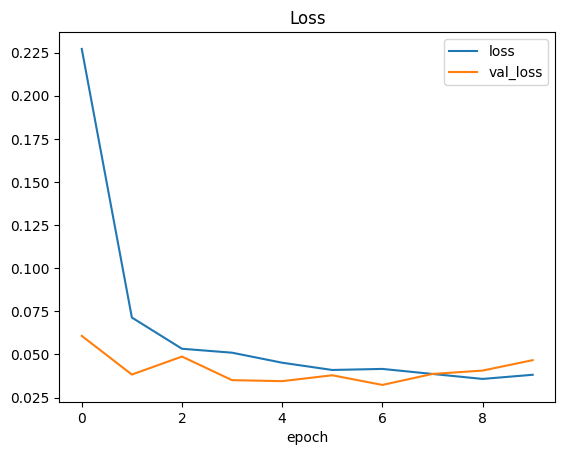

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

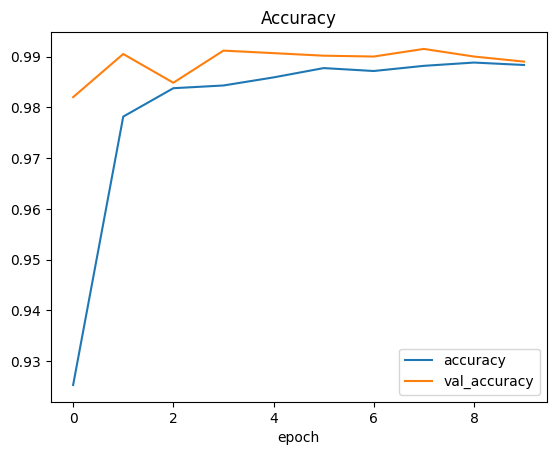

In [10]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')

<Response [200]>


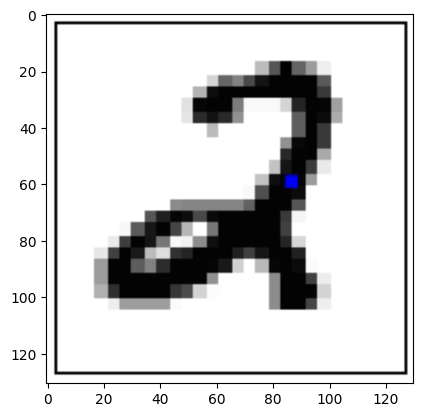

In [11]:
import requests
from PIL import Image

url = 'https://colah.github.io/posts/2014-10-Visualizing-MNIST/img/mnist_pca/MNIST-p1815-4.png'
response = requests.get(url, stream=True)
print(response)
img = Image.open(response.raw)
plt.imshow(img)

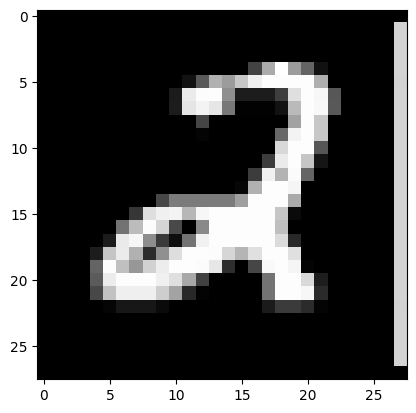

In [12]:
import cv2
img = np.asarray(img)
img = cv2.resize(img, (28, 28))
img = img.astype(np.uint8) # convert to uint8
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(img)
plt.imshow(img, cmap=plt.get_cmap('gray'))

In [13]:
img = img/255
img = img.reshape(1, 28, 28, 1)

In [14]:
predictions = np.argmax(model.predict(img))
print('Prediction = ',predictions)

2024-10-28 14:42:55.000111: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 366ms/step
Prediction =  2


In [15]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score = ', score[0])
print('Test accuracy = ', score[1])

2024-10-28 14:42:56.886967: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Test score =  0.03934074938297272
Test accuracy =  0.9896000623703003


## let's look at the structure of convolutional layers

In [17]:
layer1 = Model(inputs=model.layers[0].input, outputs=model.layers[0].output)
layer2 = Model(inputs=model.layers[0].input, outputs=model.layers[2].output)

In [18]:
visual_layer1 = layer1.predict(img)
visual_layer2 = layer2.predict(img)

print(visual_layer1.shape)
print(visual_layer2.shape)

1/1 [==============================] - 0s 30ms/step
(1, 24, 24, 30)
(1, 10, 10, 15)


2024-10-28 14:43:27.811507: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-10-28 14:43:27.861809: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


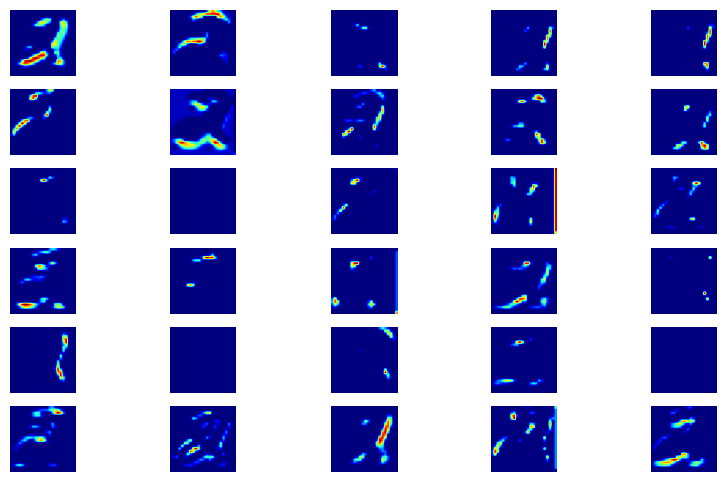

In [19]:
plt.figure(figsize=(10,6))
for i in range(30):
  plt.subplot(6, 5, i+1)
  plt.imshow(visual_layer1[0, :, :, i], cmap=plt.get_cmap('jet'))
  plt.axis('off')

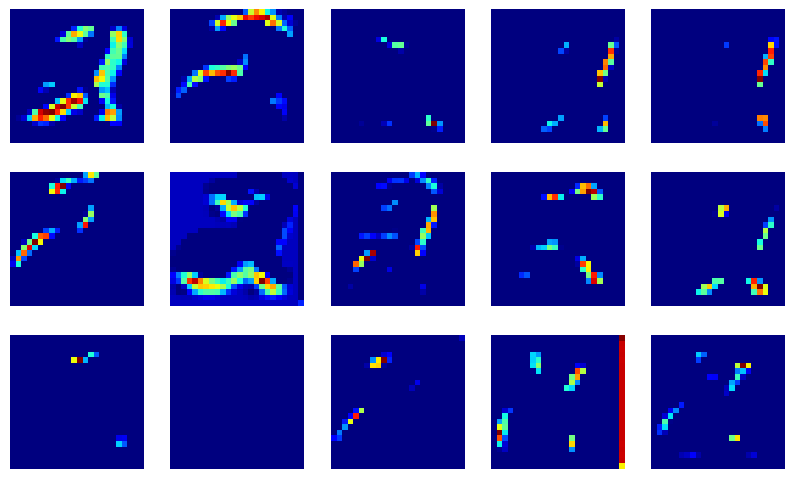

In [20]:
plt.figure(figsize=(10,6))
for i in range(15):
  plt.subplot(3, 5, i+1)
  plt.imshow(visual_layer1[0, :, :, i], cmap=plt.get_cmap('jet'))
  plt.axis('off')